In [ ]:
from scipy.stats import binom, norm, poisson
import numpy as np
import matplotlib.pyplot as plt

# 1. Distribución binomial (Discreta)

- Modelar situaciones en las que realizamos sucecivos experimentos en los que solo tenemos 2 posibles resultados (éxito/fracaso).

- Parametros:

p (probabilidad de éxito)

n (total de experimentos o ensayos que se realizan)

k (total de experimentos exitosos)

- Funciones de porbabilidad:

Probability mass function (PMF): Nos devuelve la probabilidad de k éxitos dados n experimentos.

Cummulative Density Function (CDF): Nos devuelve la probabilidad acumulada hasta un punto.

Se sabe que la probabilidad de que un paciente diabético tipo II necesite insulina es del 36.2%. A nuestro centro de salud acuden 10 pacientes con esta condición.

- ¿Cuál es la probabilidad de que exactamente 2 de estos pacientes necesiten insulina?




In [ ]:
# Parámetros
p = 0.362
n = 10
k = 2
binom.pmf(k,n,p)

np.float64(0.16188070407160315)

In [ ]:
# Simular 1_000 entradas de 10 pacientes
binom.rvs(n, p, size=1000)

array([1, 3, 3, 4, 3, 4, 6, 5, 3, 4, 3, 6, 5, 4, 0, 3, 4, 4, 2, 3, 4, 5,
       4, 4, 2, 3, 4, 2, 4, 4, 5, 4, 5, 2, 3, 3, 7, 1, 4, 4, 5, 4, 0, 2,
       3, 1, 3, 5, 3, 6, 2, 8, 5, 4, 7, 4, 2, 5, 4, 8, 6, 4, 3, 2, 3, 1,
       1, 5, 3, 6, 6, 5, 2, 6, 4, 4, 6, 4, 2, 5, 3, 2, 2, 4, 3, 5, 7, 2,
       3, 5, 3, 4, 5, 6, 6, 5, 5, 2, 3, 4, 5, 3, 3, 3, 7, 5, 4, 5, 3, 5,
       1, 2, 5, 2, 4, 6, 2, 3, 7, 2, 4, 3, 4, 4, 5, 3, 4, 3, 0, 3, 3, 6,
       4, 5, 5, 4, 7, 3, 2, 1, 4, 5, 2, 2, 2, 3, 5, 2, 1, 3, 4, 4, 1, 2,
       5, 7, 1, 4, 4, 3, 5, 3, 3, 2, 3, 3, 4, 4, 1, 5, 6, 2, 6, 4, 6, 4,
       2, 4, 4, 3, 1, 3, 3, 5, 4, 6, 4, 3, 5, 5, 4, 5, 3, 5, 4, 1, 4, 2,
       2, 6, 3, 2, 3, 4, 7, 5, 5, 4, 5, 4, 4, 3, 6, 3, 5, 6, 4, 5, 6, 2,
       4, 4, 3, 2, 3, 2, 5, 4, 3, 2, 1, 5, 5, 3, 3, 3, 3, 3, 4, 5, 6, 6,
       2, 4, 3, 1, 5, 4, 5, 6, 5, 3, 4, 4, 3, 5, 7, 2, 5, 4, 2, 5, 3, 5,
       1, 4, 5, 2, 1, 2, 3, 7, 1, 6, 4, 4, 8, 4, 7, 4, 1, 2, 6, 2, 3, 5,
       3, 4, 5, 2, 4, 4, 3, 3, 3, 2, 5, 4, 0, 5, 4,

- ¿Cuál es la probabilidad de que al menos 5 pacientes necesiten insulina?

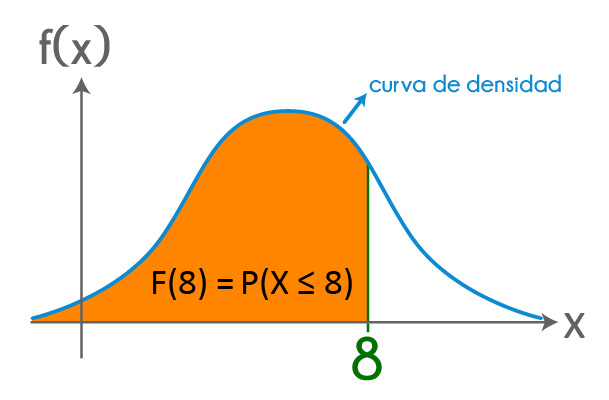

In [ ]:
print(sum(binom.pmf(range(5,11),n,p)))
print(1-binom.cdf(k=4, n=n, p=p))
print(binom.sf(k=4, n=n, p=p))

0.2754011835427399
0.2754011835427399
0.27540118354273996


- Tenemos 3 dosis de insulina en reserva. ¿Cuál es la probabilidad de tener suficientes dosis?

In [ ]:
print(binom.cdf(k=3, n=n, p=p))
print(sum(binom.pmf(range(0,4),n,p)))

0.48139093247663567
0.481390932476636


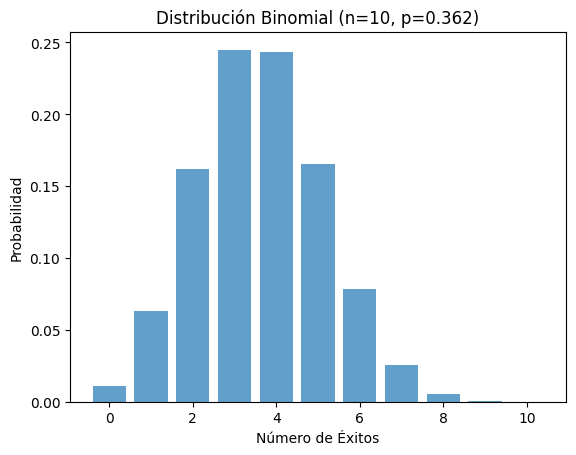

In [ ]:
# Crear una lista de valores posibles de X (número de éxitos)
x = np.arange(0, n + 1)

# Calcular las probabilidades correspondientes para cada valor de X
probabilidades = binom.pmf(x, n, p)

# Crear el gráfico de barras
plt.bar(x, probabilidades, align='center', alpha=0.7)
plt.xlabel('Número de Éxitos')
plt.ylabel('Probabilidad')
plt.title(f'Distribución Binomial (n={n}, p={p})')
plt.show()

In [ ]:
binom.cdf(2, n, p)

np.float64(0.23645544711019778)

# Distribución normal (Continua)

- Parámetros:

media (valor centrar de la distribución).

desviación típica: en promedio cuánto se dispersan los valores de la media.

Ejemplo de los niveles de colesterol sérico en sangre. Tomamos una muestra de pacientes y medimos sus niveles de colesterol.

In [ ]:
media = 219 # mg/dL
desv = 50 # mg/dL

In [ ]:
# Qué proporción de la población posee niveles deseables de colesterol <200
menor_200 = norm.cdf(x=200, loc=media, scale=desv)
menor_200

np.float64(0.3519727075758372)

In [ ]:
# Que proporción de la población supera los niveles extremos de colesterol (250)
mayor_250 = norm.sf(x=250, loc=media, scale=desv)
mayor_250

np.float64(0.26762889346898305)

In [ ]:
# Proporción de la población con niveles límite de colesterol (200-250)
entre_200_250 = norm.cdf(x=250,loc=media, scale=desv)-norm.cdf(x=200,loc=media, scale=desv)
entre_200_250

np.float64(0.3803983989551798)

In [ ]:
menor_200+mayor_250+entre_200_250

np.float64(1.0)

# Distribución de Poisson (Discreta)

- Modelamos el total de eventos que ocurren en el tiempo.

Una central eléctrica recibe un promedio de 3 alertas de mentenimiento por dia.

¿Cuál es probabilidad de que reciban exactamente 5 llamadas en un día?

¿Cuál es la probabilidad de que reciban más de 2 llamadas en un día?

In [ ]:
poisson.pmf(k=5, mu=3)

np.float64(0.10081881344492458)

In [ ]:
poisson.sf(k=2, mu=3)

np.float64(0.5768099188731566)

In [ ]:
1-poisson.cdf(k=2, mu=3)

np.float64(0.5768099188731564)